<a href="https://colab.research.google.com/github/lindsay99m/GEOL-558-Supervised/blob/main/lmoller_supervised_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

I will be using volcanic eruption data from around the world. The dataset was taken from Kaggle, but is orginially data from the Smithsonian Institue.  This data contains the location, volcano, VEI, eruption
start and end data, etc. I will use this data to determine the probability of an eruption based on eruption intervals, volcano, and volcano
type. I am using this data because it has a wide range of eruption data by type, volcano, and has similar data sets that contain other interesting data  like detection
of eruptions via tree ring data and sulfur in ice cores. This information is important to the public as it can show a trends and patterns in erruption data that can be usful to the public. Many heavliy populated areas are near volcanos so if scientists and pbulic are better able to predict the volcanic activity then it can decrease the amount of loss and damage incured from volcanic events.

# Pre-Processing

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import zipfile
import io

url = 'https://raw.githubusercontent.com/lindsay99m/GEOL-558-Supervised/d1c739cdcca211595b652b9d8c7e9d74d7471789/eruptions.csv.zip'

# download the zip file from the url
import requests
response = requests.get(url)

# extract the CSV file from the zip archive in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('eruptions.csv') as f: # 0pen the 'eruptions.csv' file within the zip archive
        data = pd.read_csv(f) # read the CSV file into a pandas DataFrame

data.describe()

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
count,11178.000000,11178.000000,8272.000000,11177.000000,10985.000000,10982.000000,4332.000000,4329.000000,4326.000000,11178.000000,11178.000000
mean,300284.371176,15666.905439,1.947897,622.848260,3.450888,7.015025,1917.326639,6.220836,13.315996,16.865778,31.572377
std,52321.193203,3297.612433,1.161098,2482.174317,4.071419,9.645386,157.646408,3.686128,9.831282,30.761752,115.248384
min,210010.000000,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000
25%,263310.000000,12817.250000,1.000000,680.000000,0.000000,0.000000,1895.000000,3.000000,4.000000,-6.102000,-77.656000
50%,290050.000000,15650.500000,2.000000,1847.000000,1.000000,0.000000,1957.000000,6.000000,15.000000,17.600000,55.708000
75%,343030.000000,18463.750000,2.000000,1950.000000,7.000000,15.000000,1992.000000,9.000000,21.000000,40.821000,139.394000
max,600000.000000,22355.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,85.608000,179.580000


In [52]:
#show the data set fits the parameters
data.shape

(11178, 15)

In [53]:
#show the number of non-null data in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

This data set contains 15 columns of data with 11,178 recorded eruptions across the world.

In [54]:
#check to make sure the column names are easily useable or seaerchable
print(data.columns)

Index(['volcano_number', 'volcano_name', 'eruption_number',
       'eruption_category', 'area_of_activity', 'vei', 'start_year',
       'start_month', 'start_day', 'evidence_method_dating', 'end_year',
       'end_month', 'end_day', 'latitude', 'longitude'],
      dtype='object')


In [55]:
data.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


In [56]:
#remove are of activity column
data = data.drop(columns=['area_of_activity'])

# EDA

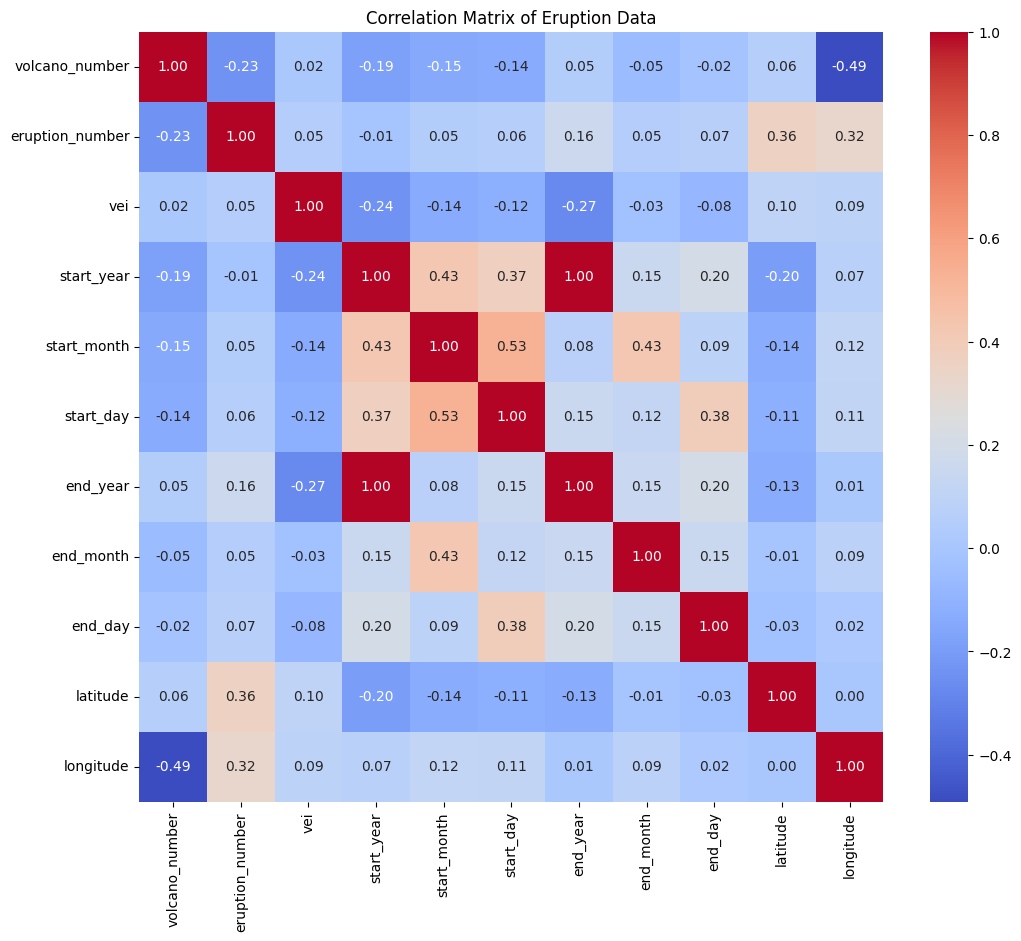

In [57]:
#consider numerical data only
corr_matrix = data.select_dtypes(include=np.number).corr()

# plot heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Eruption Data')
plt.show()

The correlation heat map shows that there is a correlation with the eruption start and end days, months, and year, and there is a slight correlation with eruption number and latitude and longitude. The date correlation makes sense as most erupution events are not for extended amounts of time and will therefore usually occur for only a few hours to a few days.

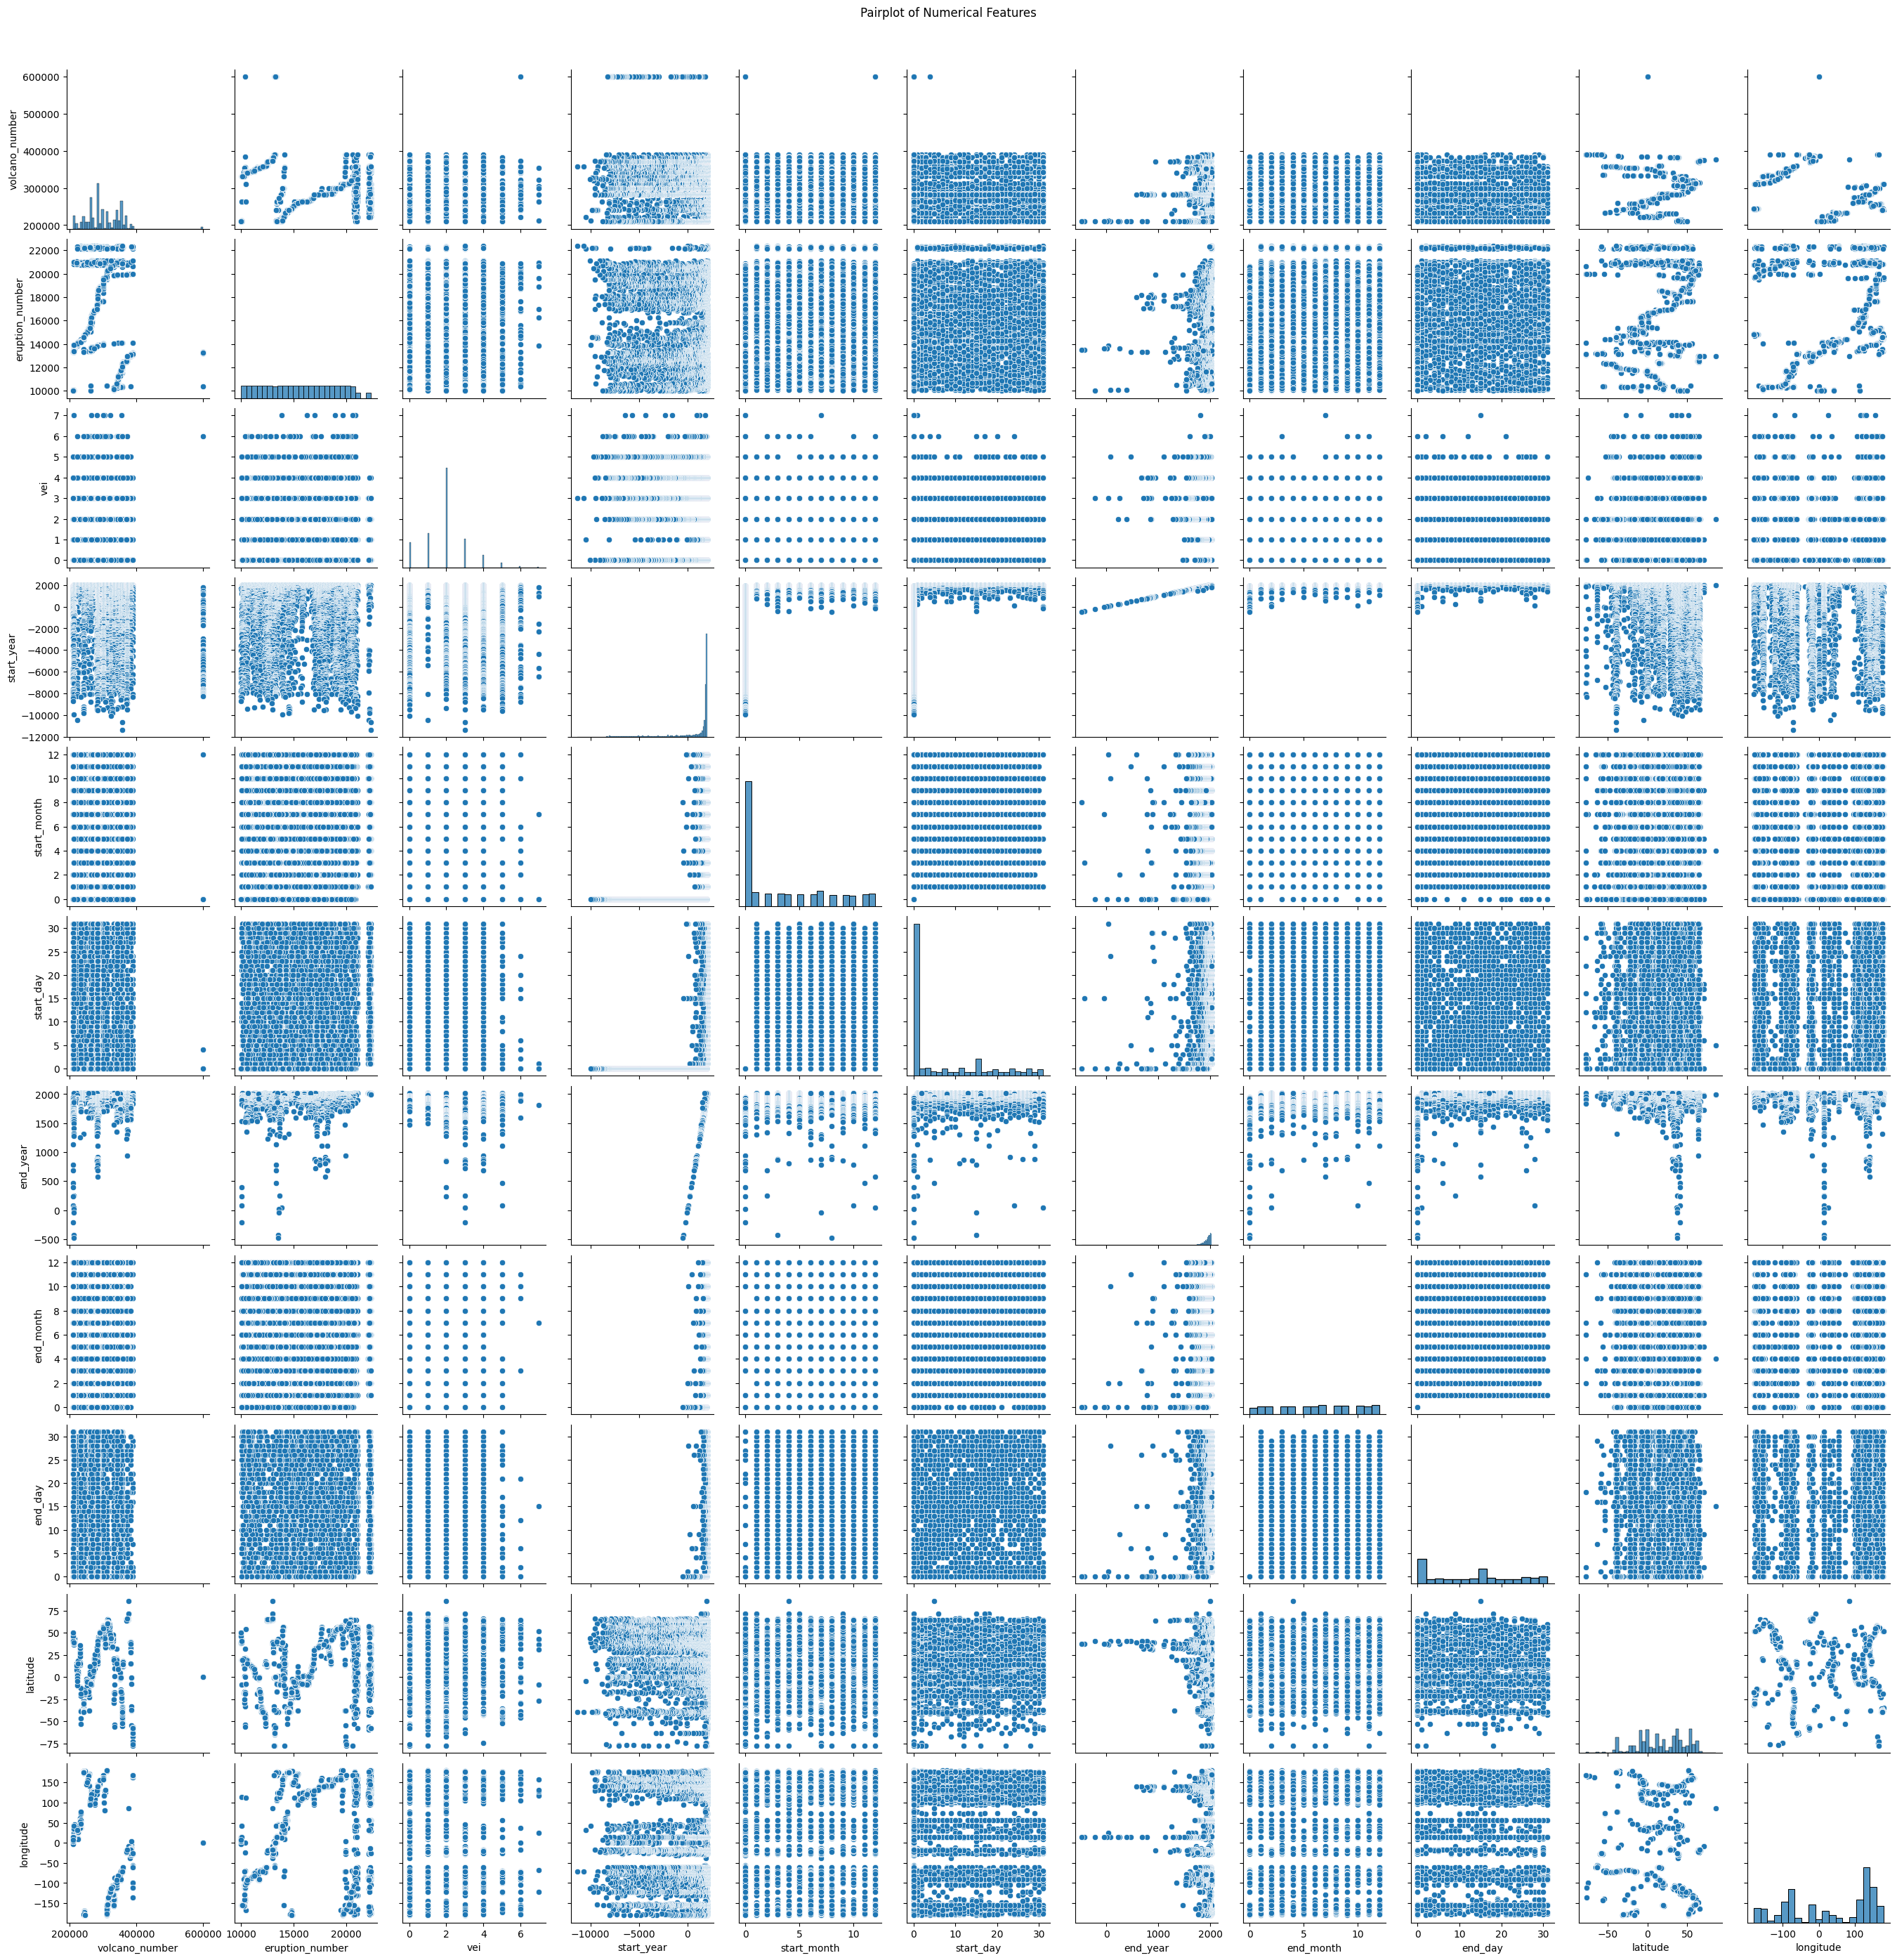

In [58]:
# plot the pairplot with nuerical data
sns.pairplot(data.select_dtypes(include=np.number))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [59]:
#print number of unique the volcanos in data set
print(len(data['volcano_name'].unique()))

921


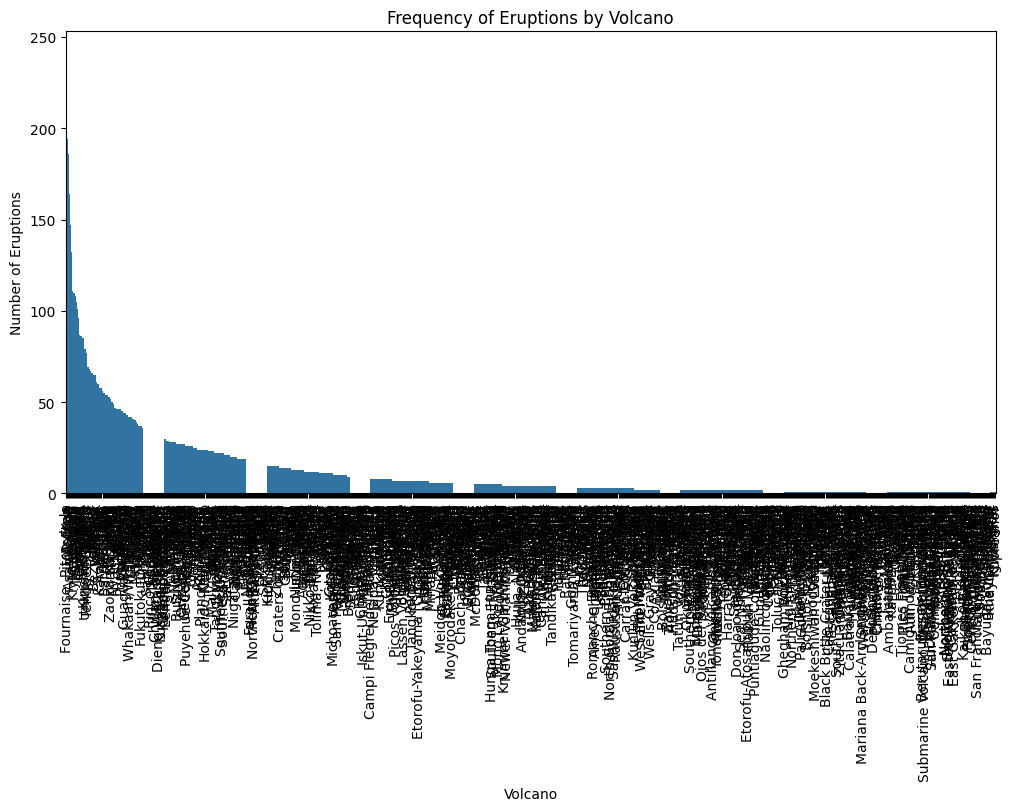

In [60]:
#plot eruption frequency by volcano
plt.figure(figsize=(12, 6))
sns.countplot(x='volcano_name', data=data, order=data['volcano_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frequency of Eruptions by Volcano')
plt.xlabel('Volcano')
plt.ylabel('Number of Eruptions')
plt.show()

In [61]:
most_frequent_volcano = data['volcano_name'].value_counts().idxmax()
frequency = data['volcano_name'].value_counts()[most_frequent_volcano]
print(f"The volcano with the highest eruption frequency is: {most_frequent_volcano}")
print(f"Etna erupted {frequency} recorded times in the dataset.")

The volcano with the highest eruption frequency is: Etna
Etna erupted 241 recorded times in the dataset.


The frequency plot shows that the highest eruption frequency is Etna with 241 eruptions. With many volancos only having 1 eruption recorded in the data set.

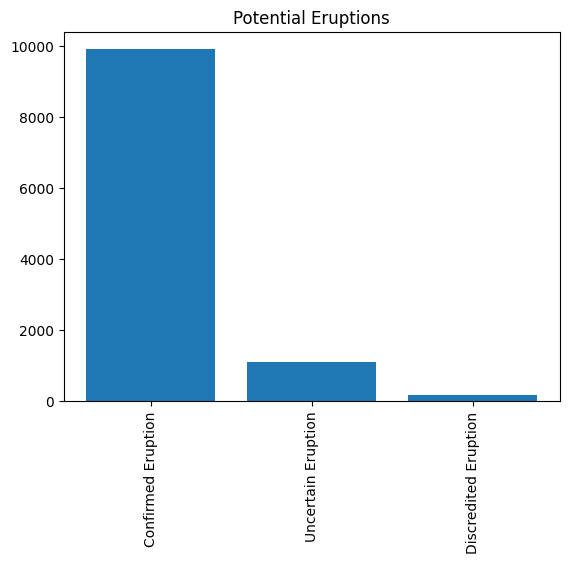

In [62]:
#show eruptions by type
plt.figure()
eruption_counts = data['eruption_category'].value_counts()
plt.bar(x=eruption_counts.index, height=eruption_counts.values)
plt.xticks(rotation=90)
plt.title('Potential Eruptions')
plt.show()

In [63]:
discredited = data['eruption_category'].value_counts()['Discredited Eruption']
print(f"{discredited} of the recorded potential eruptions were not eruptions.")

166 of the recorded potential eruptions were not eruptions.


In [64]:
confirmed = data['eruption_category'].value_counts()['Confirmed Eruption']
print(f"{confirmed} of the recorded potential eruptions are confirmed eruptions.")

9900 of the recorded potential eruptions are confirmed eruptions.


The potential eruption figure shows the number of potentially recorded eruptions are actual eruptions, how many are still considered potential eruptuons and how many events previously thought to be eruptions are not.

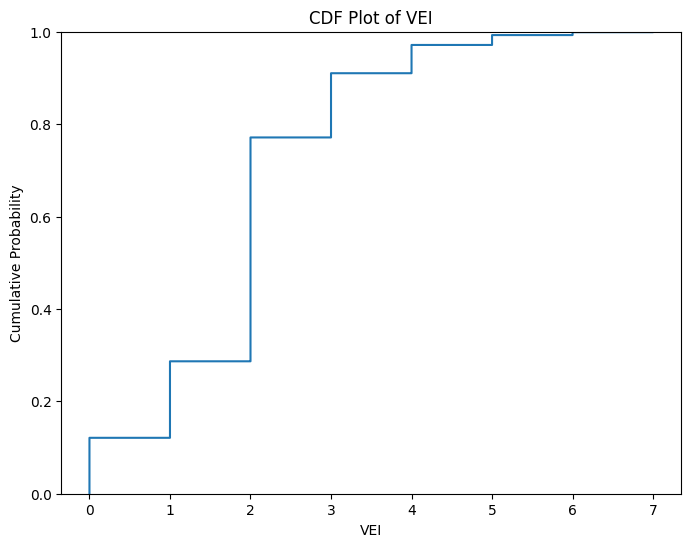

In [66]:
# create a CDF plot for the VEI
plt.figure(figsize=(8, 6))
sns.ecdfplot(data['vei'].dropna())  #drop missing values
plt.title('CDF Plot of VEI')
plt.xlabel('VEI')
plt.ylabel('Cumulative Probability')
plt.show()

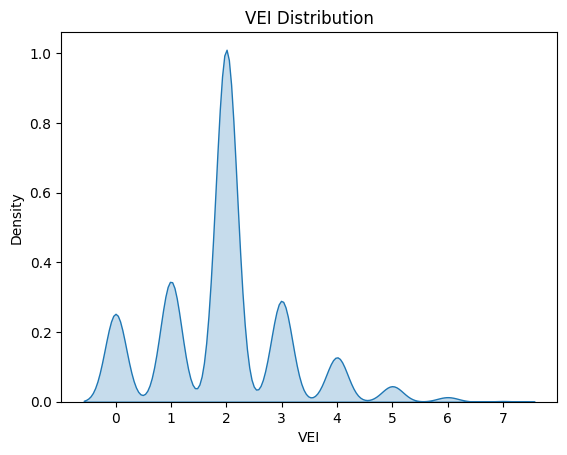

In [74]:
sns.kdeplot(data['vei'], fill=True)
plt.title('VEI Distribution')
plt.xlabel('VEI')
plt.ylabel('Density')
plt.show()

The graph shows the majority of recorded eruptions have a VEI of 2. This is considered an explosive eruption on the VEI scale so on average the recorded eruptions have a potential threat to human life.

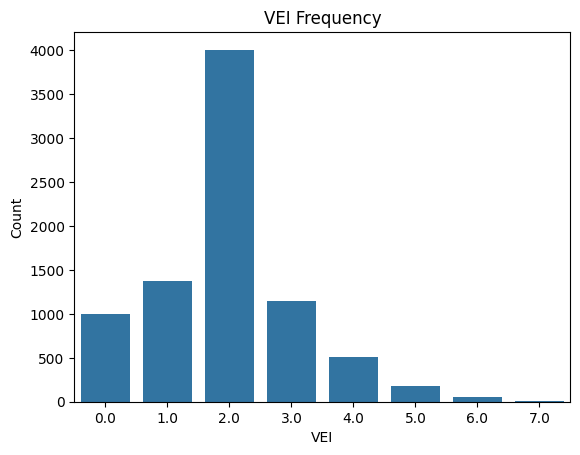

In [75]:
sns.countplot(x='vei', data=data)
plt.title('VEI')
plt.xlabel('VEI')
plt.ylabel('Count')
plt.show()